In [1]:
# search chinese font
from matplotlib.font_manager import FontManager

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Alimama DongFangDaKai
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10


In [2]:
import pandas as pd
film_details_df = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/films_info.csv', encoding='gbk')
film_details_df['Rating_value'] = [float(i) for i in film_details_df['Rating_value']]
film_details_df['Year'] = [str(i) for i in film_details_df['Year']]

In [3]:
film_details_df.head()

,Film_name,URL,Year,Director,Actors,Genre,Rating_count,Rating_value,IMDb,Description,Interesting_count,Watched_count
0,超能一家人,https://movie.douban.com/subject/35228789/,2023,宋阳,"'艾伦', '沈腾', '陶慧', '张琪', '韩彦博', '白丽娜', '康晞娅', '...","'喜剧', '家庭', '奇幻'",52844,4.0,tt12787014,郑前（艾伦 饰）新开发的APP被狡猾又诚实的反派乞乞科夫（沈腾 饰）盯上了。幸好郑前一家人意...,54367.0,36868.0
1,满江红,https://movie.douban.com/subject/35766491/,2023,张艺谋,"'沈腾', '易烊千玺', '张译', '雷佳音', '岳云鹏', '王佳怡', '潘斌龙'...","'剧情', '喜剧', '悬疑', '古装'",993333,7.0,tt21148018,南宋绍兴年间，岳飞死后四年，秦桧率兵与金国会谈。会谈前夜，金国使者死在宰相驻地，所携密信也不...,1085283.0,71428.0
2,独行月球,https://movie.douban.com/subject/35183042/,2022,张吃鱼,"'沈腾', '马丽', '常远', '李诚儒', '黄才伦', '李嘉琦', '郝瀚', '...","'喜剧', '科幻'",677450,6.6,tt14557302,人类为抵御小行星的撞击，拯救地球，在月球部署了月盾计划。陨石提前来袭，全员紧急撤离时，维修工...,815477.0,40755.0
3,四海,https://movie.douban.com/subject/35337517/,2022,韩寒,"'刘昊然', '刘浩存', '沈腾', '尹正', '乔杉', '周奇', '张宥浩', '...","'喜剧', '动作', '爱情'",250478,5.3,tt14509614,在码头做摩托车特技表演顺便拉客的年轻人吴仁耀（刘昊然 饰），他多年不见的浪荡父亲吴仁腾（沈腾...,NaN,NaN
4,我和我的父辈,https://movie.douban.com/subject/35294995/,2021,吴京,"'吴京', '章子怡', '徐峥', '沈腾', '吴磊', '黄轩', '袁近辉', '任...",'剧情',265552,6.5,tt15465312,继2019年《我和我的祖国》、2020年《我和我的家乡》，国庆三部曲之《我和我的父辈》接棒定...,NaN,NaN


/home/ouyangkang/software/anaconda3/envs/ML/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 22247 (\N{CJK UNIFIED IDEOGRAPH-56E7}) missing from current font.
  func(*args, **kwargs)
/home/ouyangkang/software/anaconda3/envs/ML/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22247 (\N{CJK UNIFIED IDEOGRAPH-56E7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


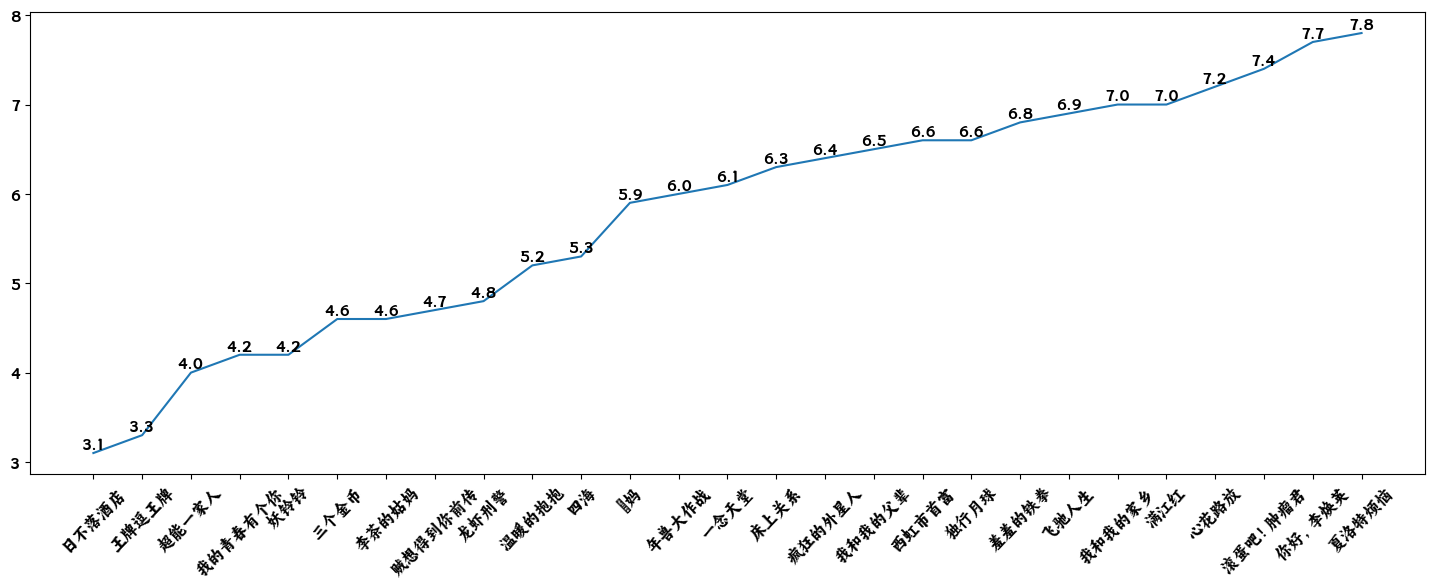

In [4]:
import matplotlib.pyplot as plt

movie_score = film_details_df[['Film_name', 'Rating_value']].sort_values(by='Rating_value')
labels = movie_score['Rating_value'].tolist()

plt.figure(figsize=(18, 6))

plt.rc("font", family='Alimama DongFangDaKai')
plt.rcParams['font.size'] = 12

plt.plot(movie_score['Film_name'], movie_score['Rating_value'])
plt.xticks(rotation=45)

for i in range(len(movie_score['Film_name'].tolist())):
    plt.text(movie_score['Film_name'].tolist()[i], movie_score['Rating_value'].tolist()[i], labels[i], ha='center', va='bottom')

Text(0.5, 1.0, 'Averge Score And Count of Films Each Year')

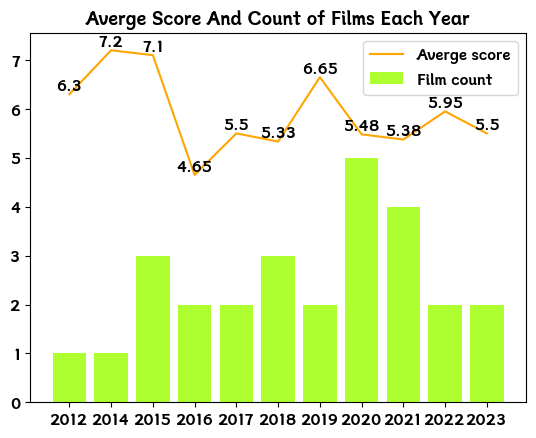

In [23]:
import matplotlib.pyplot as plt

year_analysis = film_details_df.groupby('Year').agg({'Rating_value':'mean', 'Film_name':'count'})

plt.bar(year_analysis.index, year_analysis['Film_name'], label='Film count', color='greenyellow')
plt.plot(year_analysis.index, year_analysis['Rating_value'], label='Averge score', color='orange')
for i in range(len(year_analysis.Rating_value)):
    plt.text(year_analysis.index.tolist()[i], year_analysis['Rating_value'].tolist()[i], round(year_analysis['Rating_value'].tolist()[i], 2), ha='center', va='bottom')
# add legend
plt.legend()
# add title
plt.title('Averge Score And Count of Films Each Year')
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/film/analysis_fig/count_average_score.png')

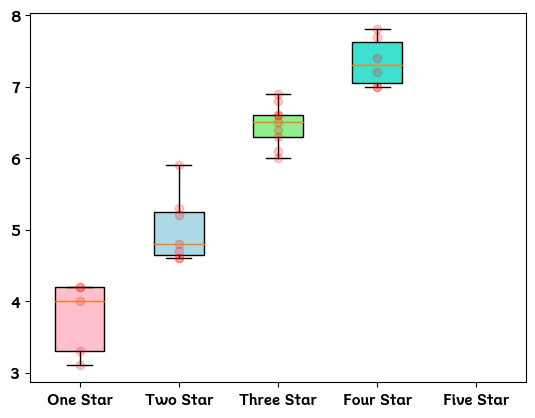

In [6]:
'''
五星档 8.5~10分
四星档 7~8.5分
三星档 6~7分
二星档 4.5~6分
一星档 2~4.5分
'''
def level_assignment(score):
    if score >= 8.5:
        return 'Five'
    elif score >= 7:
        return 'Four'
    elif score >= 6:
        return 'Three'
    elif score >= 4.5:
        return 'Two'
    else:
        return 'One'
film_details_df['Level'] = list(map(level_assignment, film_details_df['Rating_value'].tolist()))

# draw box figure
level_analysis = [film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist() for level in ["One", "Two", "Three", "Four", "Five"]]

labels = ["One Star", "Two Star", "Three Star", "Four Star", "Five Star"]
colors = ['pink', 'lightblue', 'lightgreen', 'turquoise', 'mediumslateblue']

bplot = plt.boxplot(level_analysis, labels=labels, patch_artist=True, vert=True)

# fill color
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# add dots to box
for num, level in enumerate(["One", "Two", "Three", "Four", "Five"]):
    plt.plot([num + 1]*len(film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist()), film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist(), 'ro', alpha=0.2)
    
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/film/analysis_fig/level_analysis.png')

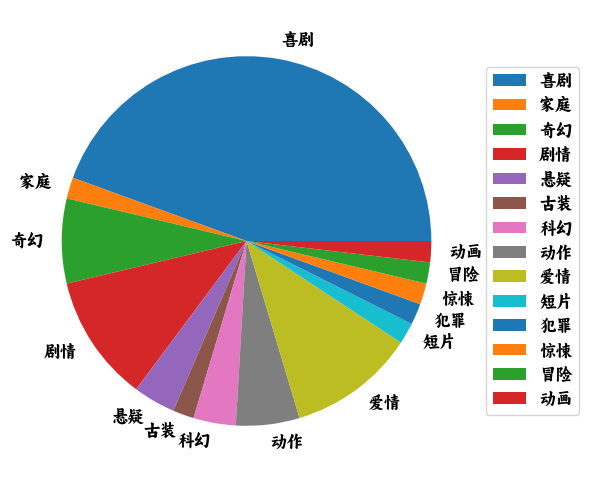

In [9]:
import re

genre_dic = {}
total_num = 0

for i in film_details_df.Genre:
    genre = re.sub('\'', '', i)
    genre = [k.strip() for k in genre.split(',')]
    for g in genre:
        genre_dic[g] = genre_dic.get(g, 0) + 1
        total_num += 1

fig, ax = plt.subplots(figsize=(12,6), subplot_kw=dict(aspect='equal'))

wages, text=plt.pie((pd.DataFrame(genre_dic.items(), columns=['Genre', 'Count']).Count / total_num).tolist(),
        labels=pd.DataFrame(genre_dic.items(), columns=['Genre', 'Count']).Genre,
        )

ax.legend(wages, pd.DataFrame(genre_dic.items(), columns=['Genre', 'Count']).Genre, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

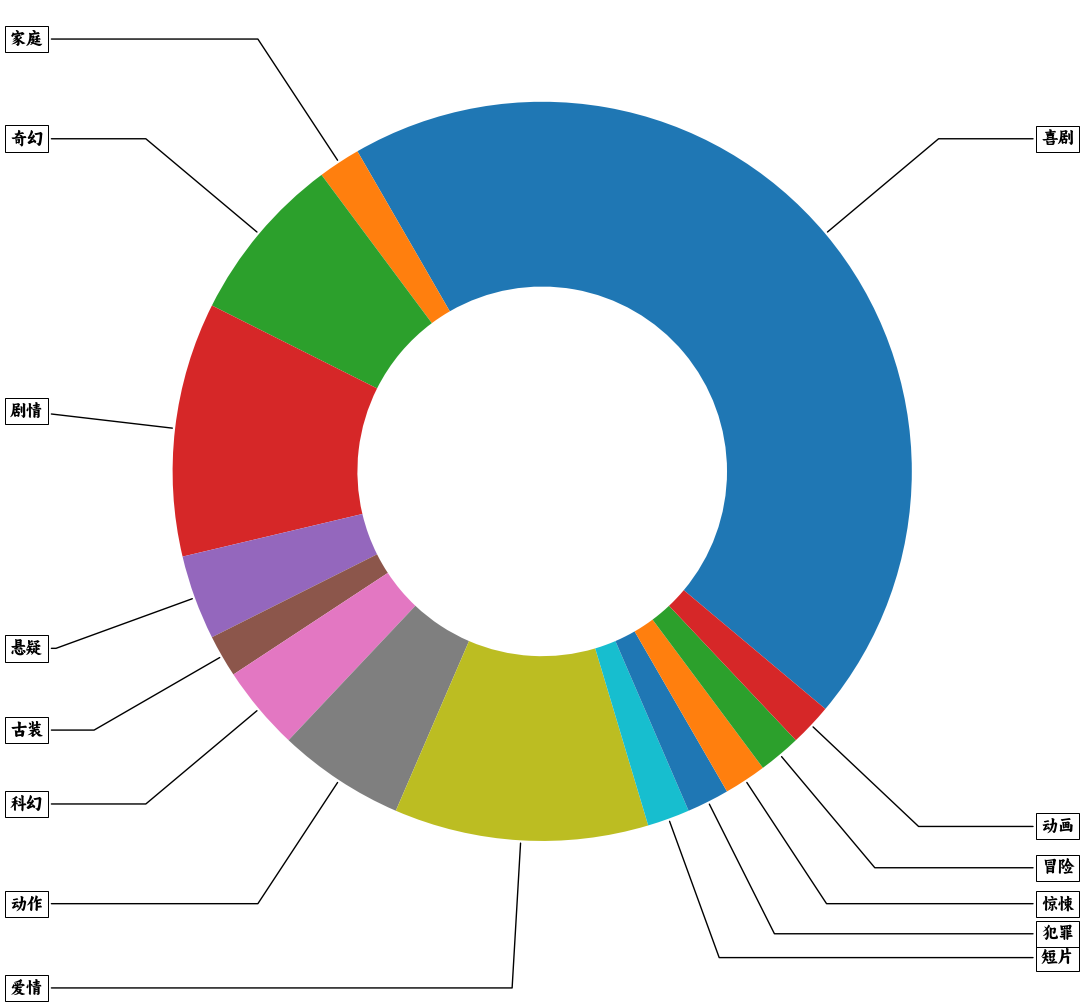

In [10]:
import numpy as np

fig, ax = plt.subplots(figsize=(24, 12), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pd.DataFrame(genre_dic.items(), columns=['Genre', 'Count']).Count.tolist(),
                       wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle='square, pad=0.3', fc='w', ec='k', lw=0.72)

kw = dict(arrowprops=dict(arrowstyle='-'),
          bbox=bbox_props,
          zorder=0,
          va='center')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalaligment = {-1:'right', 1:'left'}[int(np.sign(x))]
    connectionstyle = f"angle, angleA=0, angleB={ang}"
    kw['arrowprops'].update({'connectionstyle':connectionstyle})

    ax.annotate(pd.DataFrame(genre_dic.items(), columns=['Genre', 'Count']).Genre.tolist()[i],
                xy=(x, y),
                xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalaligment,
                **kw)
    
plt.show()

In [12]:
# data pre-procession
fit_data = film_details_df[['Rating_count', 'Rating_value', 'Interesting_count', 'Watched_count']]
fit_data['Rating_count'] = list(map(float, fit_data['Rating_count'].tolist()))
fit_data['Interesting_count'] = list(map(float, fit_data['Interesting_count'].tolist()))
fit_data['Watched_count'] = list(map(float, fit_data['Watched_count'].tolist()))
known_data = fit_data.dropna(subset=['Interesting_count', 'Watched_count'])
unknown_data = fit_data[fit_data.isna().any(axis=1)]

/tmp/ipykernel_16600/1010002638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['Rating_count'] = list(map(float, fit_data['Rating_count'].tolist()))
/tmp/ipykernel_16600/1010002638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['Interesting_count'] = list(map(float, fit_data['Interesting_count'].tolist()))
/tmp/ipykernel_16600/1010002638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [13]:
known_data.head()

,Rating_count,Rating_value,Interesting_count,Watched_count
0,52844.0,4.0,54367.0,36868.0
1,993333.0,7.0,1085283.0,71428.0
2,677450.0,6.6,815477.0,40755.0
5,11566.0,4.2,20662.0,5232.0
6,27442.0,3.1,51534.0,12054.0


In [14]:
unknown_data

,Rating_count,Rating_value,Interesting_count,Watched_count
3,250478.0,5.3,NaN,NaN
4,265552.0,6.5,NaN,NaN


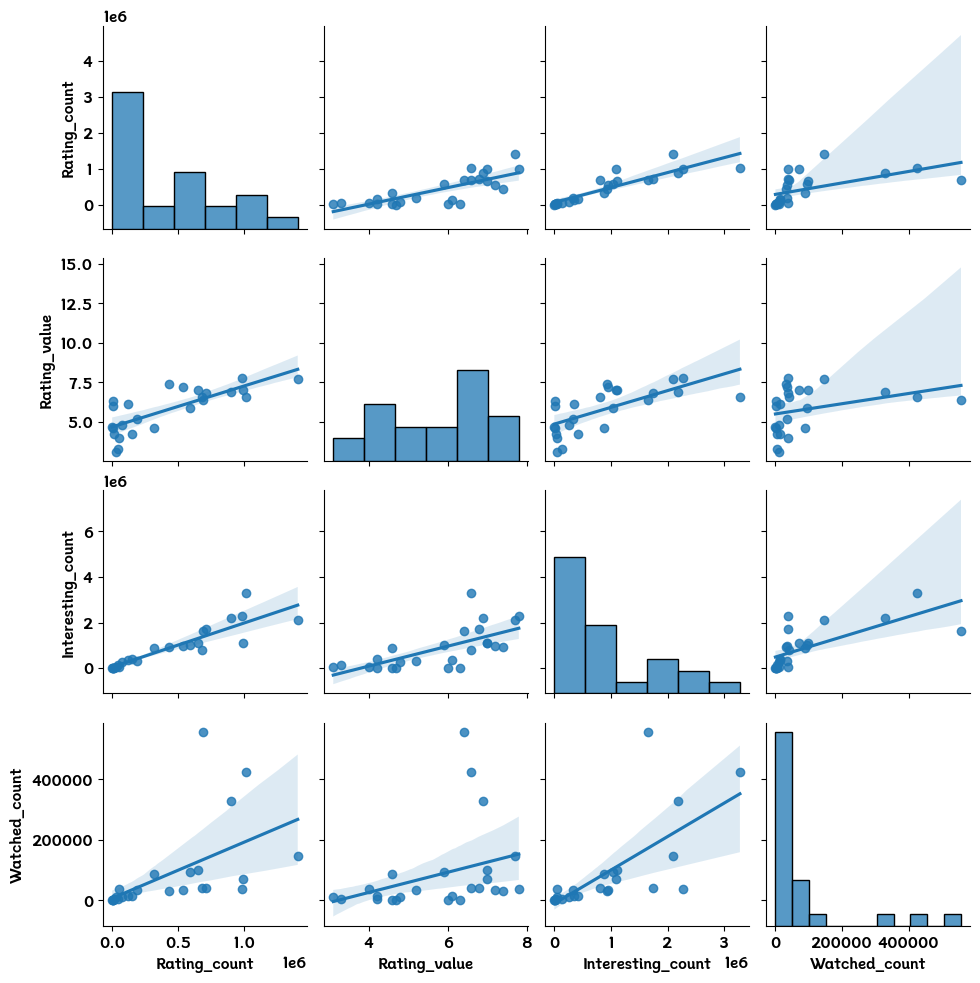

In [15]:
import seaborn as sns

# correlation analysis
sns.pairplot(known_data, kind="reg")
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/film/analysis_fig/correlation.png')

<Axes: >

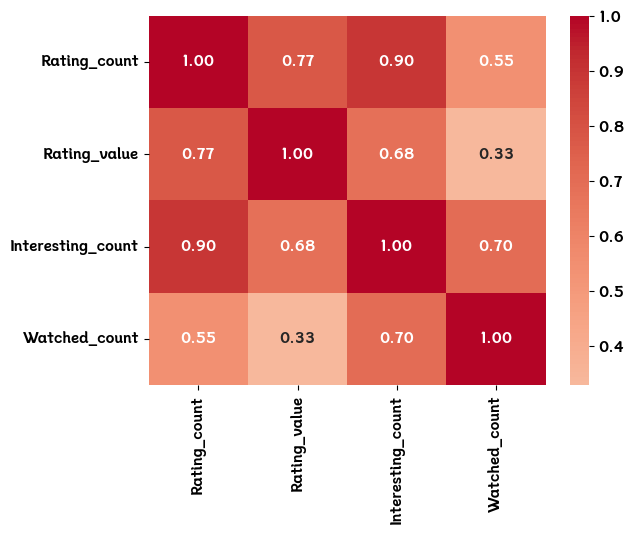

In [16]:
sns.heatmap(known_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)

<Axes: >

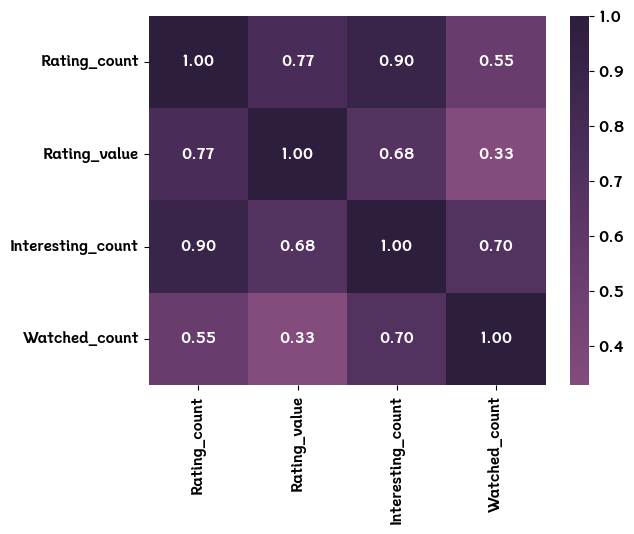

In [17]:
# regulate color
sns.heatmap(known_data.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True), center=0)
# sns.heatmap(known_data.corr(), annot=True, fmt='.2f', cmap=sns.color_palette("cubehelix", as_cmap=True), center=0)

In [18]:
from sklearn import linear_model

# interesting count model
reg_interesting = linear_model.LinearRegression()
reg_interesting.fit(known_data[['Rating_count', 'Rating_value']], known_data['Interesting_count'])
# slope
print(reg_interesting.coef_)
# intercept
print(reg_interesting.intercept_)
# fill na
unknown_data['Interesting_count'] = list(reg_interesting.predict(unknown_data[['Rating_count', 'Rating_value']]))


[ 1.98864639e+00 -2.06935340e+04]
146116.31179852784


/tmp/ipykernel_16600/2979122651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['Interesting_count'] = list(reg_interesting.predict(unknown_data[['Rating_count', 'Rating_value']]))


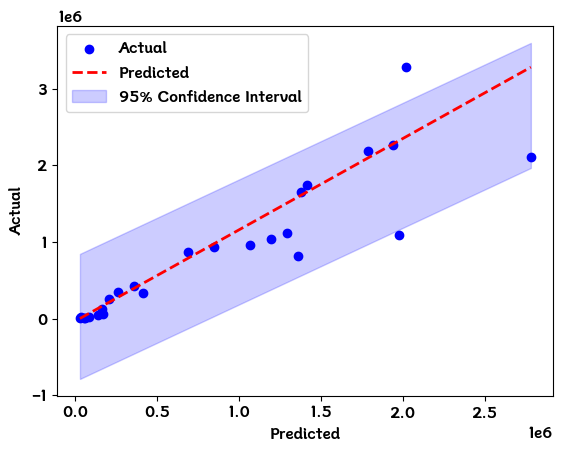

In [19]:
import numpy as np
import scipy.stats as stats

coef = reg_interesting.coef_
intercept = reg_interesting.intercept_

x_test = known_data[['Rating_count', 'Rating_value']]
y_pred = np.dot(x_test, coef) + intercept
y_test = known_data['Interesting_count']

# confidence area
confidence = 0.95
alpha = 1 - confidence

residuals = y_test - y_pred
std_err = np.std(residuals, ddof=1)

margin_of_error = std_err *  stats.t.ppf(1 - alpha / 2, df=len(y_pred) - 1)

confidence_lower = y_pred - margin_of_error
confidence_upper = y_pred + margin_of_error

sorted_indices = np.argsort(y_pred)
y_pred_sorted = y_pred[sorted_indices]
confidence_lower_sorted = confidence_lower[sorted_indices]
confidence_upper_sorted = confidence_upper[sorted_indices]

plt.scatter(y_pred_sorted, np.array(y_test)[sorted_indices], color='blue', label='Actual')
plt.plot([min(y_pred_sorted), max(y_pred_sorted)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted')
plt.fill_between(y_pred_sorted, confidence_lower_sorted, confidence_upper_sorted, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

In [20]:
from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error

x_train = known_data[['Rating_count', 'Rating_value', 'Interesting_count']]
y_train = known_data['Watched_count']

svr_model = SVR(kernel='linear').fit(x_train, y_train)
# fill na
unknown_data['Watched_count'] = svr_model.predict(unknown_data[['Rating_count', 'Rating_value', 'Interesting_count']])

/tmp/ipykernel_16600/4232767165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['Watched_count'] = svr_model.predict(unknown_data[['Rating_count', 'Rating_value', 'Interesting_count']])
